In [1381]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

g_label_fontsize = 16

colors = [
    "#455D7A",
    "#233142",
    "#F95959",
]

edgecolors = [
    "#FFFFFF",
    "#FFFFFF",
    "#FFFFFF",
]

hatches = ["", "", ""]

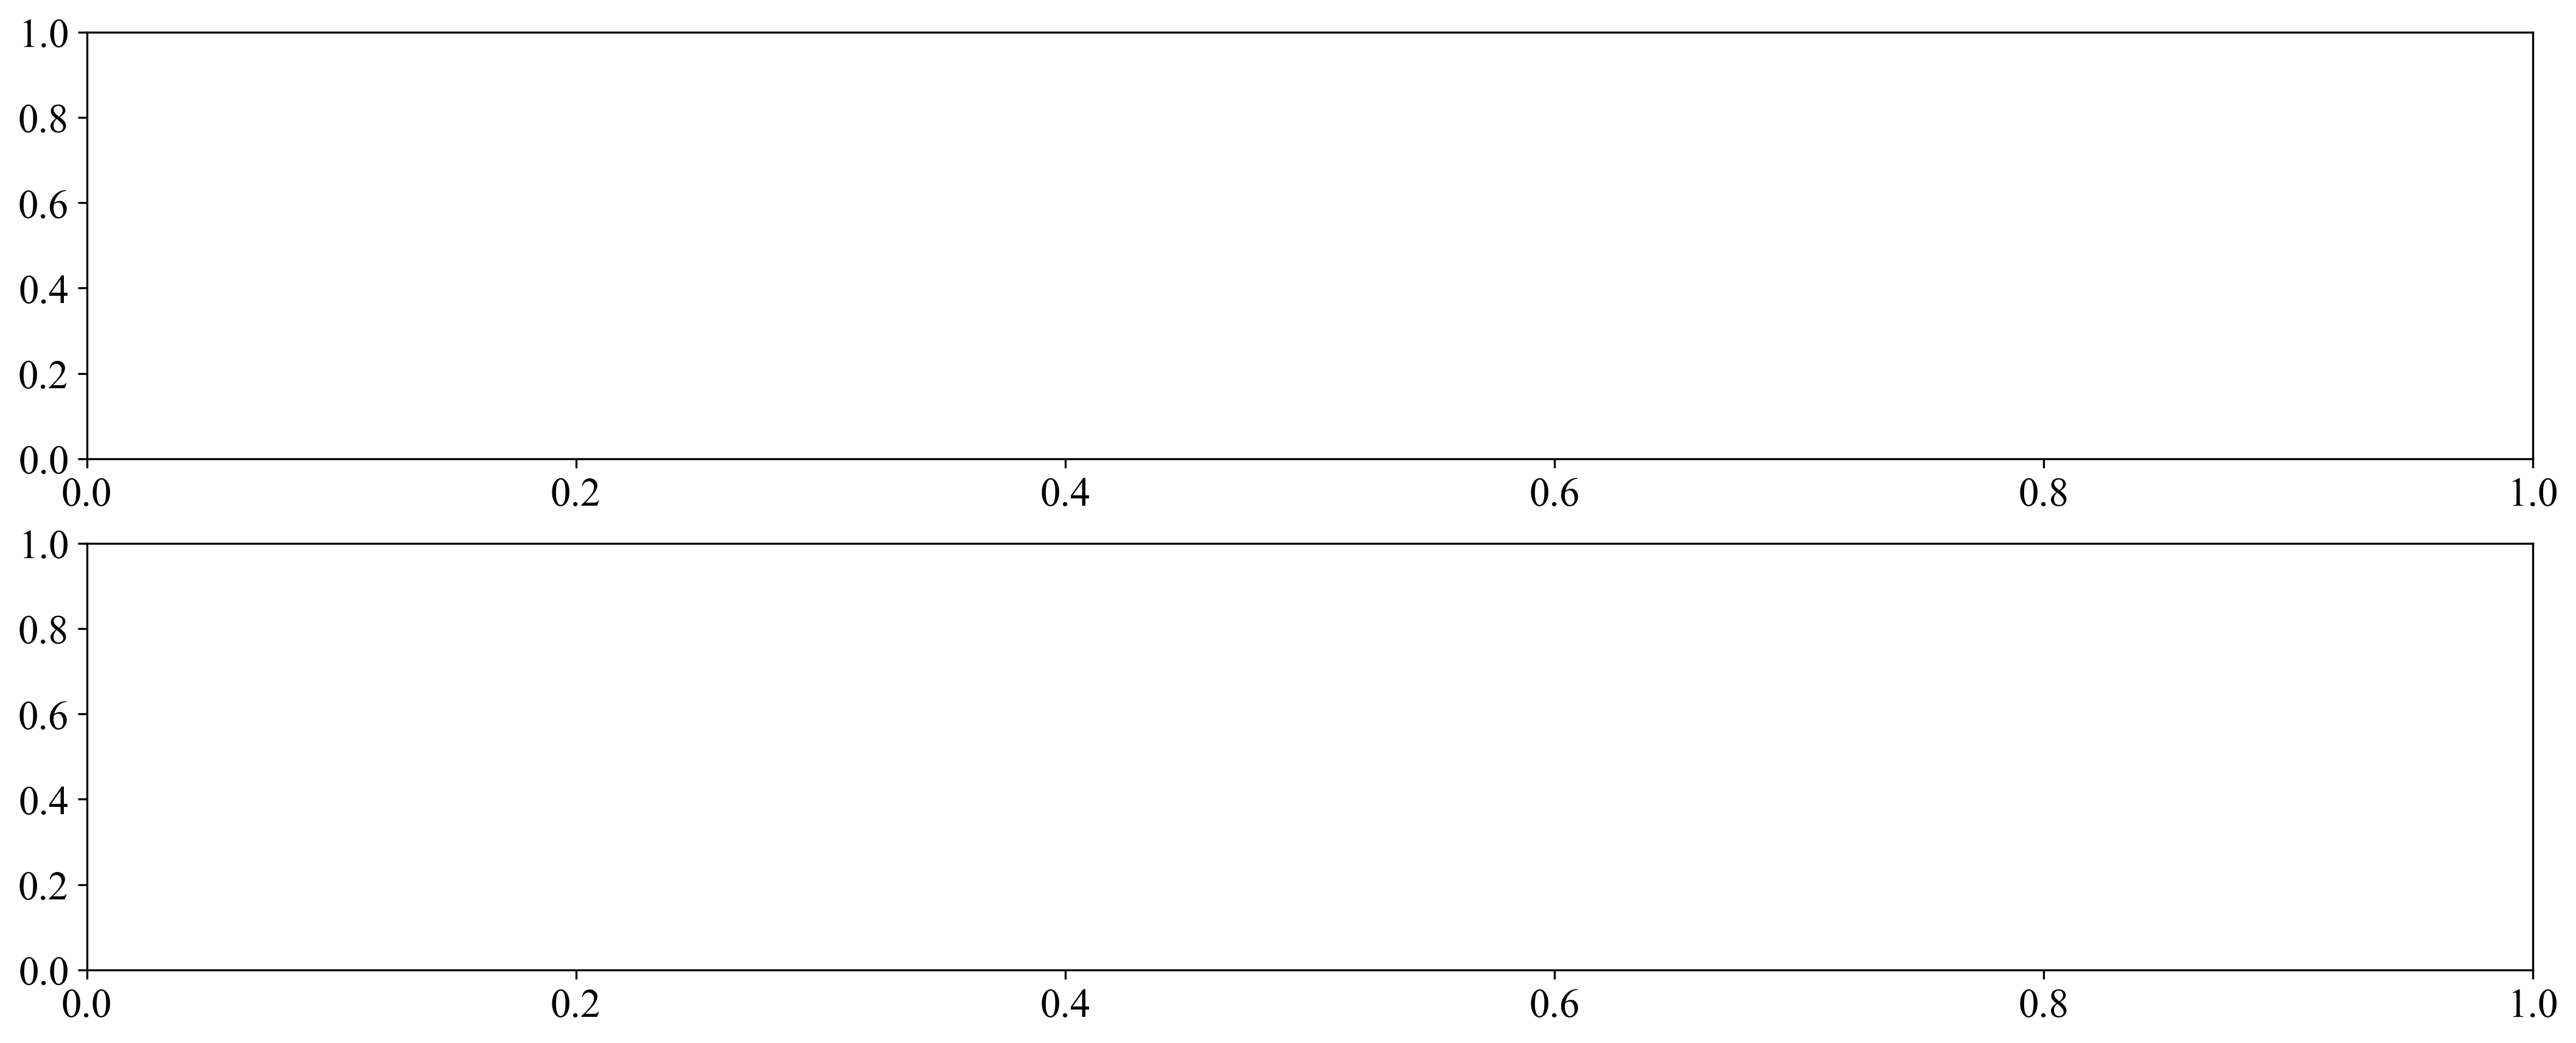

In [1382]:
fig, ax = plt.subplots(
    figsize=(14, 14 / 2.5), ncols=1, nrows=2, constrained_layout=True, dpi=300
)

In [1383]:
# MFU
data_a = {
    "ModelA\n#8GPUs": [53, 53, 65],  # 22.64
    "ModelA\n#16GPUs": [53, 53, 65],  # 22.64
    "ModelB\n#8GPUs": [35, 35, 48],  # 37
    "ModelB\n#16GPUs": [35, 35, 48],  # 37
    "ModelC\n#8GPUs": [53, 53, 65],  # 22.64
    "ModelC\n#16GPUs": [53, 53, 65],  # 22.64
    "ModelD\n#8GPUs": [53, 53, 65],  # 22.64
    "ModelD\n#16GPUs": [53, 53, 65],  # 22.64
}

In [1384]:
# overlapping rate
data_b = {
    "ModelA\n#8GPUs":  [54, 62, 12],
    "ModelA\n#16GPUs": [54, 62, 12],
    "ModelB\n#8GPUs":  [52, 62, 12],
    "ModelB\n#16GPUs": [52, 62, 12],
    "ModelC\n#8GPUs":  [52, 62, 12],
    "ModelC\n#16GPUs": [52, 62, 12],
    "ModelD\n#8GPUs":  [53, 62, 12],
    "ModelD\n#16GPUs": [52, 62, 12],
}

In [1385]:
# communication baseline
data_c = {
    "ModelA\n#8GPUs": 70,
    "ModelA\n#16GPUs": 70,
    "ModelB\n#8GPUs": 70,
    "ModelB\n#16GPUs": 70,
    "ModelC\n#8GPUs": 70,
    "ModelC\n#16GPUs": 70,
    "ModelD\n#8GPUs": 70,
    "ModelD\n#16GPUs": 70,
}

In [1386]:
legend_labels = ["FSDP", "XLA", "DLRover-Lynx"]

In [1387]:
bar_width = 0.2
group_spaing = 0.15

group_positions = {}
current_pos = 0

for x_label, y_data in data_a.items():
    group_positions[x_label] = []
    for i in range(len(y_data)):
        group_positions[x_label].append(current_pos)
        current_pos += bar_width
    current_pos += group_spaing

group_centers = {}
for x_label, positions in group_positions.items():
    group_centers[x_label] = sum(positions) / len(positions)

In [1388]:
label_set = set()
for x_label, y_data in data_a.items():
    positions = group_positions[x_label]
    for i, (pos, value, color, edgecolor, hatch, label) in enumerate(
        zip(
            positions,
            y_data,
            colors,
            edgecolors,
            hatches,
            legend_labels,
        )
    ):
        if label in label_set:
            local_label = None
        else:
            local_label = label
            label_set.add(local_label)
        ax[0].bar(
            pos,
            value,
            width=bar_width,
            color=color,
            label=local_label,
            hatch=hatch,
            edgecolor=edgecolor,
        )

ax[0].set_xticks(list(group_centers.values()))
ax[0].set_xticklabels(list(data_a.keys()))

ax[0].set_ylim(0, 100)
ax[0].set_yticks([0, 50, 100])
ax[0].set_yticklabels(["0", "50", "100"], rotation=90, ha="center", va="center")

ax[0].tick_params(axis="x", bottom=False, labelsize=11, pad=1)
ax[0].tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)

ax[0].set_ylabel("MFU (%)", fontsize=g_label_fontsize)
ax[0].set_title("(a)")

Text(0.5, 1.0, '(a)')

In [1389]:
label_set = set()
total_label = "Communication Ratio"

for x_label, y_data in data_b.items():
    positions = group_positions[x_label]
    for i, (pos, value, diff_value, color, edgecolor, label, hatch) in enumerate(
        zip(
            positions,
            y_data,
            list(data_c.values()),
            colors,
            edgecolors,
            legend_labels,
            hatches,
        )
    ):
        if label in label_set:
            local_label = None
        else:
            local_label = label
            label_set.add(local_label)

        ax[1].bar(
            pos,
            value,
            width=bar_width,
            color=color,
            edgecolor=edgecolor,
            hatch=hatch,
            label=local_label,
        )

        ax[1].bar(
            pos,
            diff_value - value,
            bottom=value,
            color="#E3E3E3",
            edgecolor=edgecolor,
            width=bar_width,
        )

ax[1].set_xticks(list(group_centers.values()))
ax[1].set_xticklabels(list(data_a.keys()))

ax[1].set_ylim(0, 100)
ax[1].set_yticks([0, 50, 100])
ax[1].set_yticklabels(["0", "50", "100"], rotation=90, ha="center", va="center")

ax[1].tick_params(axis="x", bottom=False, labelsize=11, pad=1)
ax[1].tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)

ax[1].set_ylabel("Overlapping Ratio (%)", fontsize=g_label_fontsize)
ax[1].set_title("(b)")

Text(0.5, 1.0, '(b)')

In [1390]:
ax[0].legend(
    ncol=3,
    loc="upper center",
    frameon=False,
    shadow=False,
    fontsize=g_label_fontsize,
)

In [1391]:
ax[1].arrow(
    0.5,
    80,
    -0.1,
    -10,
    width=0.01,
    head_width=0.1,
    head_length=0.1,
    color="red",
)

ax[1].text(
    0.52,
    78,
    "Proportion of Communication in the Total Latency.",
    color="red",
)

Text(0.52, 78, 'Proportion of Communication in the Total Latency.')

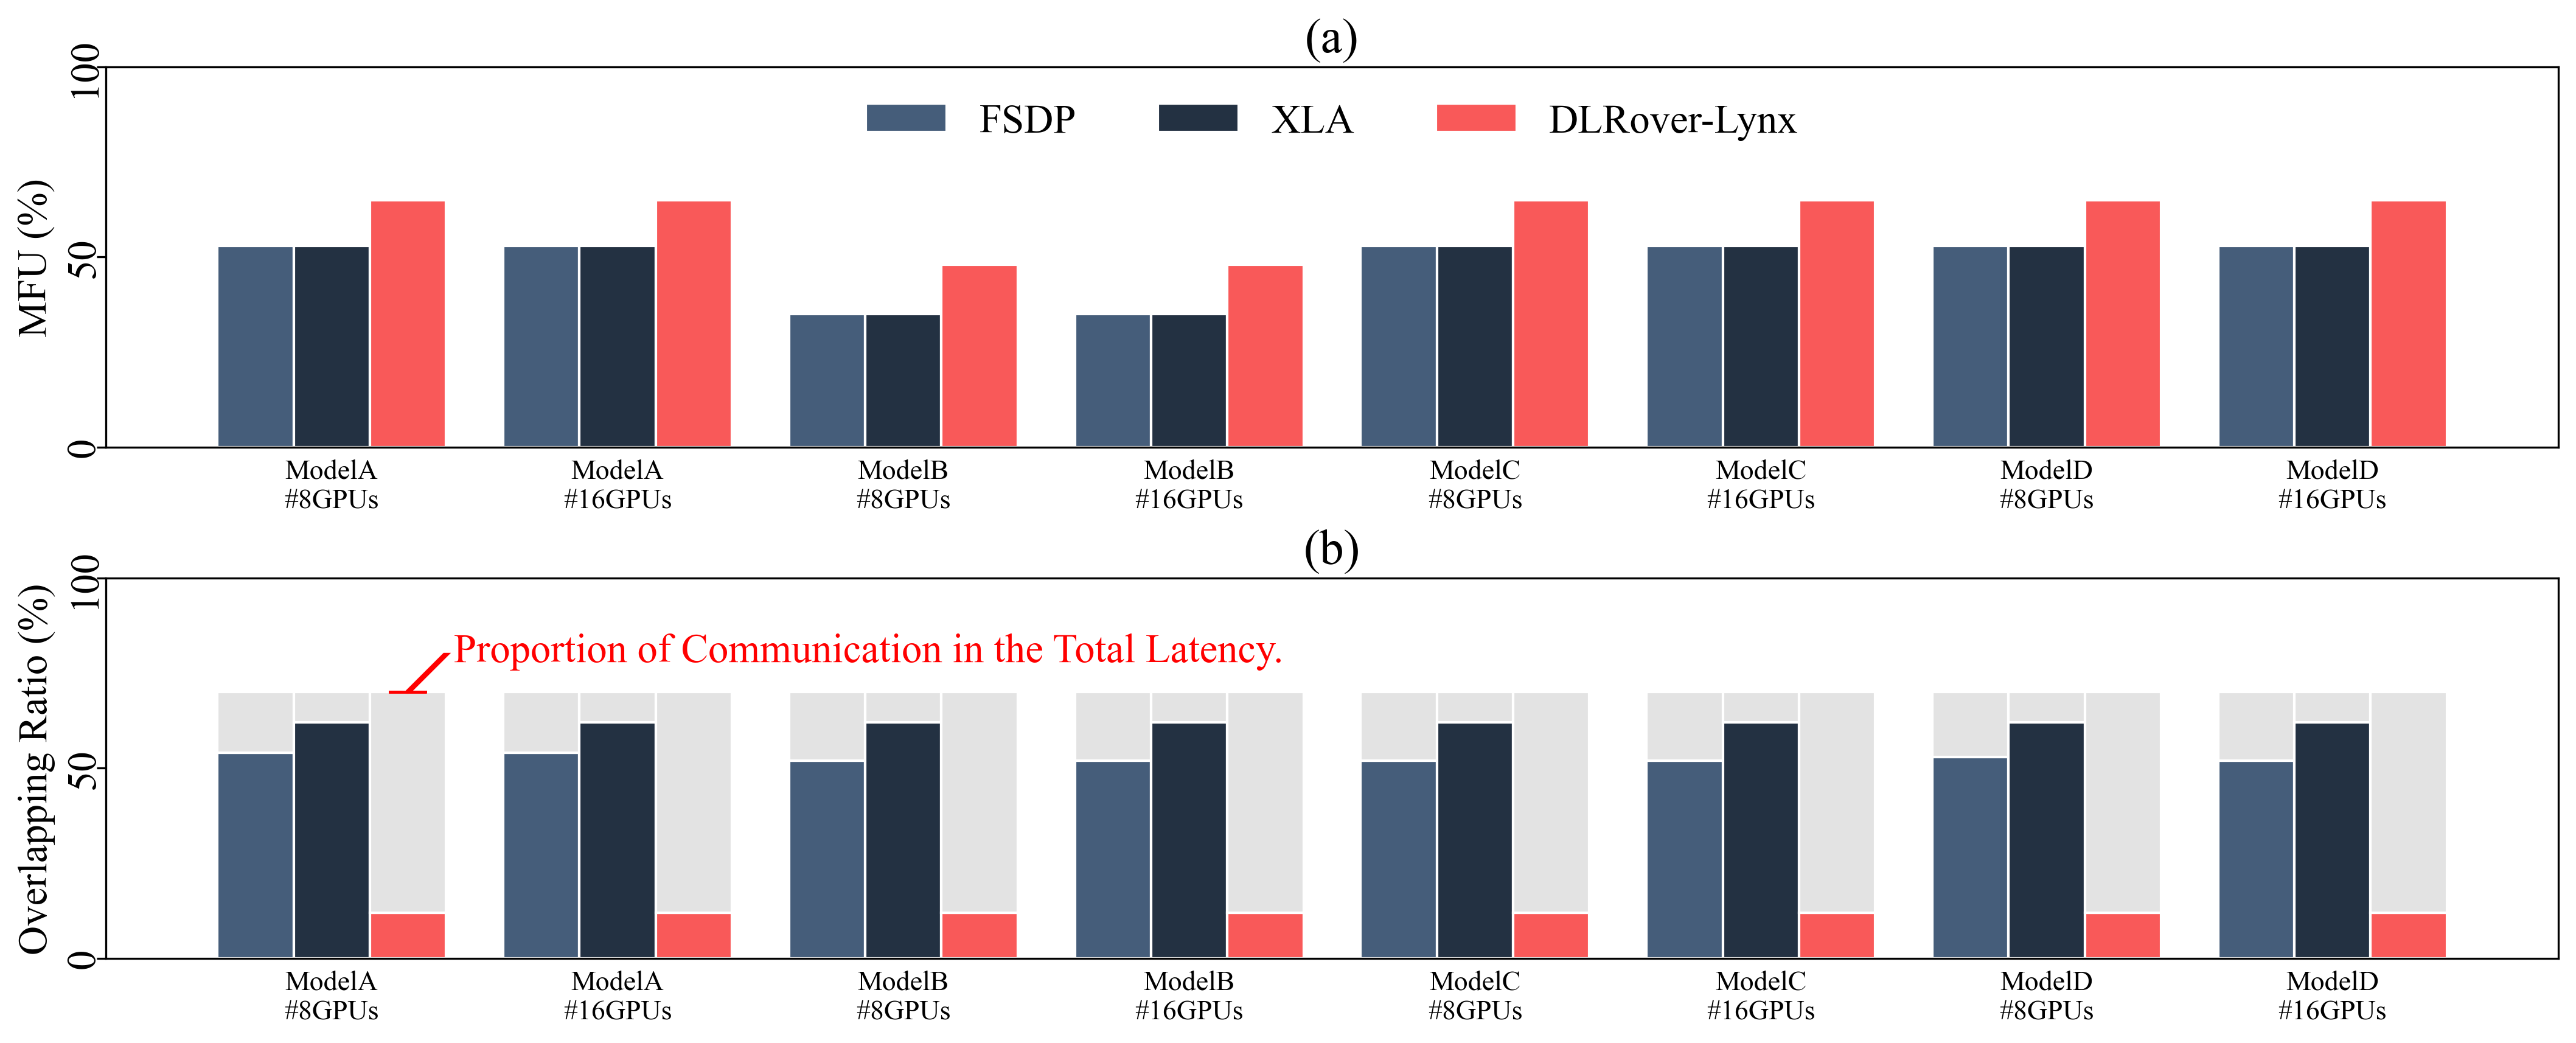

In [ ]:
fig.savefig("end_to_end.pdf", bbox_inches="tight", dpi=1000)
fig